<a href="https://colab.research.google.com/github/Hebabeg/Heba/blob/master/Churn_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/churn.csv')
X = dataset.iloc[:, 3:13]
Y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

# list all data in history

print(model_history.history.keys())


# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred,Y_test)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.6199 - accuracy: 0.6938 - val_loss: 0.5518 - val_accuracy: 0.7633
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5383 - accuracy: 0.7828 - val_loss: 0.5178 - val_accuracy: 0.7929
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5102 - accuracy: 0.7960 - val_loss: 0.4997 - val_accuracy: 0.7948
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4927 - accuracy: 0.7972 - val_loss: 0.4874 - val_accuracy: 0.7952
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4803 - accuracy: 0.7975 - val_loss: 0.4784 - val_accuracy: 0.7959
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4710 - accuracy: 0.7974 - val_loss: 0.4712 - val_accuracy: 0.7967
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4628 - accuracy: 0.7979 - val_loss: 0.4646 - val_accuracy: 0.7963

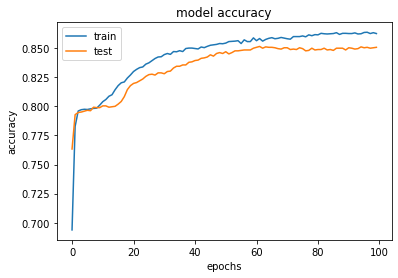

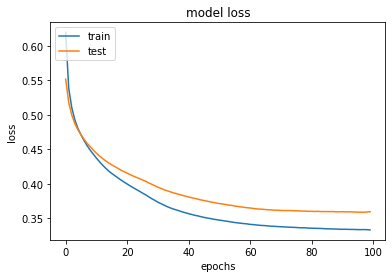

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()